In [ ]:
import matplotlib_inline.backend_inline

import pynonthermal

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [22]:
# Kozma & Fransson 1992 Figure 2 - Pure-Oxygen Plasma
x_e = 1e-2
ions = [
    # (Z, ion_stage, number_density)
    (8, 1, 1.0 - x_e),
    (8, 2, x_e),
]

sf = pynonthermal.SpencerFanoSolver(emin_ev=1, emax_ev=3000, npts=2000, verbose=True)
for Z, ion_stage, n_ion in ions:
    sf.add_ionisation(Z, ion_stage, n_ion)
    sf.add_ion_ltepopexcitation(Z, ion_stage, n_ion, temperature=6000)

sf.solve(depositionratedensity_ev=3.0e3)

sf.analyse_ntspectrum()


Setting up Spencer-Fano equation with 2000 energy points from 1.0 to 3000.0 eV...
  source is a box function from 2701.45 to 3000.00 eV with E_init 2850.73 [eV/s/cm3]
  including Z=8 ionstage 1 (O I) ionisation with n_ion 9.9e-01
  including Z=8 ionstage 1 (O I) excitation with T 6000 K (ntransitions 248, maxnlevelslower 5, maxnlevelsupper 250)
  including Z=8 ionstage 2 (O II) ionisation with n_ion 1.0e-02
  including Z=8 ionstage 2 (O II) excitation with T 6000 K (ntransitions 307, maxnlevelslower 5, maxnlevelsupper 250)
 n_ion_tot: 1.00e+00 [/cm3]        (total ion density)
       n_e: 1.00e-02 [/cm3]        (free electron density)
       x_e: 1.00e-02 [/cm3]        (electons per nucleus)
deposition: 3000.00  [eV/s/cm3]
    n_e_nt: 2.43e+09 [/cm3]

====> Z= 8 ionstage 1 O I (valence potential 13.6 eV)
               n_ion: 9.90e-01 [/cm3]
     n_ion/n_ion_tot: 0.99000
frac_ionisation_shell(n 2 l 1): 0.3604 (ionpot 13.60 eV)
frac_ionisation_shell(n 2 l 0): 0.1562 (ionpot 28.50 eV)
 

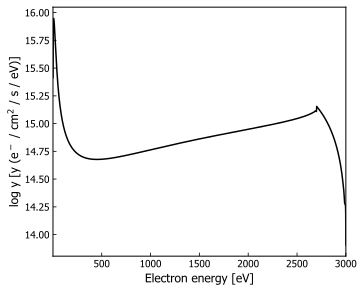

In [16]:
# sf.plot_yspectrum(en_y_on_d_en=True, xscalelog=True)
sf.plot_yspectrum()

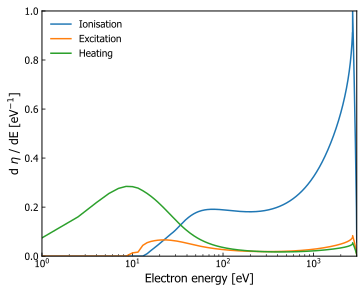

In [14]:
sf.plot_channels()

In [5]:
# get the fraction of deposited energy going to heating of the thermal electron pool
sf.get_frac_heating()

0.3956330329725191

In [6]:
# get the sum of all channel fractions. This should be close to 1.0 if the solver is numerically accurate.
sf.get_frac_sum()

0.9989675920131562

In [7]:
# get the non-thermal ionisation rate coefficient for O I
sf.get_ionisation_ratecoeff(Z=8, ion_stage=1)
# multiply by the O I population to get ionisations per second

96.92220623739135

In [8]:
# get rate coefficient for non-thermal excitation of the He II ground level up to the 8th excited level
sf.get_excitation_ratecoeff(Z=8, ion_stage=2, transitionkey=(0, 8))
# multiply by the O II ground level population to get excitations per second

3.159624760721159e-08